In [1]:
import pandas as pd
import numpy as np
import pyccl as ccl
import pandas as pd
import matplotlib.pyplot as plt

## Read in comological params from fid_vals.sh file

In [2]:
cosmo_params = dict()
with open("fid_values.sh", 'r') as f:
    for line in f:
        if line[0] != '#' and line[0] != '\n':
            words = line.split("=")
            cosmo_params[words[0]] = float(words[1][:])

In [3]:
cosmo_params["N_eff"] = 3.046

First thing we do to do a calculation in CCL is set up a cosmology object, this holds things like cosmological parameters.

In [6]:
cosmo = ccl.Cosmology(Omega_c = cosmo_params['om_m'],
                          Omega_b = cosmo_params['om_b'], 
                          h = cosmo_params['h0'],
                          A_s = cosmo_params['A_s'], 
                          n_s = cosmo_params['n_s'], 
                          Neff = cosmo_params['N_eff'], 
                          w0=cosmo_params['w0'], 
                          wa=cosmo_params['wa'])

Load the dNdz file (its already binned into seperate columns)

In [47]:
z_dNdz = np.loadtxt("tomo_lensing.dat")
z = z_dNdz[:, 0]
dNdz = z_dNdz[:, 1:]
nbins = dNdz.shape[-1]

Make lensing tracers for each bin

In [8]:
tracers = []
for i in range(dNdz.shape[-1]):
    # We need (z, dNdz) as a tuple for CCL:
    z_dNdz = (z, dNdz[:, i])
    
    # We mostly will use the defaults here. By using the defaults, we are assuming 
    # that there are no intrinsic alignments affecting this tracer (not physically realistic
    # but the simplest case for debugging.)
    tracers.append(ccl.WeakLensingTracer(cosmo, dndz=z_dNdz))

Stick each pair of tracers together to get auto and cross correlations; 
the orderings are the same as COSMOSIS

In [48]:
orderings = [(i, j) for j in range(1, nbins+1) for i in range(1, j+1)]

In [10]:
cls = []
ells = np.arange(76, 1000)
for ordering in orderings:
    index1 = ordering[0] - 1
    index2 = ordering[1] - 1
    cls.append(ccl.angular_cl(cosmo, tracers[index1], tracers[index2], ells))

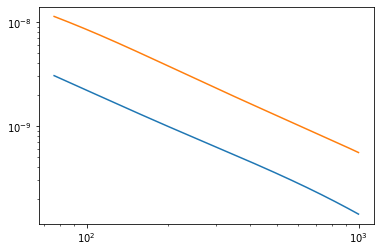

In [11]:
plt.loglog(ells, cls[0])
plt.loglog(np.loadtxt("out_w0_sn_all/equal_space/1_bins/Cl_fid.dat")[:, 0], \
           np.loadtxt("out_w0_sn_all/equal_space/1_bins/Cl_fid.dat")[:, 1])

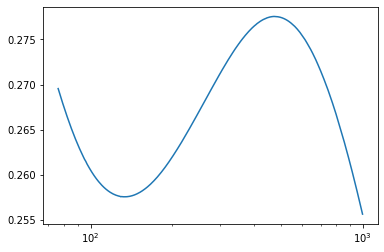

In [12]:
plt.semilogx(ells, cls[0]/np.loadtxt("out_w0_sn_all/equal_space/1_bins/Cl_fid.dat")[:, 1]) 
plt.show()

In [21]:
cosmo

AttributeError: 'Cosmology' object has no attribute '__lib__'

See how C_ells change by stepping up A_s

In [55]:
cosmo_params_plus = {i:cosmo_params[i] for i in cosmo_params}

In [56]:
cosmo_params_plus["A_s"] = cosmo_params["A_s"] + 0.1*cosmo_params["A_s"]

In [57]:
cosmo_plus = ccl.Cosmology(Omega_c = cosmo_params_plus['om_m'],
                          Omega_b = cosmo_params_plus['om_b'], 
                          h = cosmo_params_plus['h0'], 
                          A_s = cosmo_params_plus['A_s'], 
                          n_s = cosmo_params_plus['n_s'], 
                          Neff = cosmo_params_plus['N_eff'], 
                          w0=cosmo_params_plus['w0'], 
                          wa=cosmo_params_plus['wa'])

In [58]:
tracers = []
for i in range(dNdz.shape[-1]):
    # We need (z, dNdz) as a tuple for CCL:
    z_dNdz = (z, dNdz[:, i])
    
    # We mostly will use the defaults here. By using the defaults, we are assuming 
    # that there are no intrinsic alignments affecting this tracer (not physically realistic
    # but the simplest case for debugging.)
    tracers.append(ccl.WeakLensingTracer(cosmo_plus, dndz=z_dNdz))

In [59]:
cls_plus = []
ells = np.arange(76, 1000)
for ordering in orderings:
    index1 = ordering[0] - 1
    index2 = ordering[1] - 1
    cls_plus.append(ccl.angular_cl(cosmo_plus, tracers[index1], tracers[index2], ells))

In [60]:
for i in range(len(cls)):
    print(cls[i] - cls_plus[i])

[-3.57592265e-10 -3.52712544e-10 -3.47954650e-10 -3.43315322e-10
 -3.38789643e-10 -3.34373534e-10 -3.30064272e-10 -3.25858006e-10
 -3.21750815e-10 -3.17739847e-10 -3.13822092e-10 -3.09994355e-10
 -3.06253650e-10 -3.02597264e-10 -2.99022486e-10 -2.95526798e-10
 -2.92107813e-10 -2.88762752e-10 -2.85489447e-10 -2.82286036e-10
 -2.79150131e-10 -2.76079374e-10 -2.73072094e-10 -2.70126576e-10
 -2.67240603e-10 -2.64412477e-10 -2.61640669e-10 -2.58923548e-10
 -2.56259039e-10 -2.53646230e-10 -2.51083465e-10 -2.48569128e-10
 -2.46101998e-10 -2.43680865e-10 -2.41304376e-10 -2.38971178e-10
 -2.36680222e-10 -2.34430460e-10 -2.32220641e-10 -2.30049661e-10
 -2.27916713e-10 -2.25820729e-10 -2.23760691e-10 -2.21735632e-10
 -2.19744810e-10 -2.17787431e-10 -2.15862496e-10 -2.13969185e-10
 -2.12106831e-10 -2.10274781e-10 -2.08472157e-10 -2.06698242e-10
 -2.04952453e-10 -2.03234143e-10 -2.01542699e-10 -1.99877383e-10
 -1.98237626e-10 -1.96623014e-10 -1.95032886e-10 -1.93466654e-10
 -1.91923829e-10 -1.90403

In [38]:
ccl.sigma8(cosmo_plus)

0.9622314788041265

In [39]:
ccl.sigma8(cosmo)

0.9622314788041265

Let's try a big deviation and see if that changes the C_ells

In [46]:
cosmo_params_big_plus = {i:cosmo_params[i] for i in cosmo_params}

In [47]:
cosmo_params_big_plus["A_s"] = cosmo_params["A_s"] + 0.5*cosmo_params["A_s"]

In [49]:
cosmo_big_plus = ccl.Cosmology(Omega_c = cosmo_params_big_plus['om_m'],
                          Omega_b = cosmo_params_big_plus['om_b'], 
                          h = cosmo_params_big_plus['h0'], 
                          A_s = cosmo_params_big_plus['A_s'], 
                          n_s = cosmo_params_big_plus['n_s'], 
                          Neff = cosmo_params_big_plus['N_eff'], 
                          w0=cosmo_params_big_plus['w0'], 
                          wa=cosmo_params_big_plus['wa'])

In [50]:
tracers = []
for i in range(dNdz.shape[-1]):
    # We need (z, dNdz) as a tuple for CCL:
    z_dNdz = (z, dNdz[:, i])
    
    # We mostly will use the defaults here. By using the defaults, we are assuming 
    # that there are no intrinsic alignments affecting this tracer (not physically realistic
    # but the simplest case for debugging.)
    tracers.append(ccl.WeakLensingTracer(cosmo_big_plus, dndz=z_dNdz))

In [53]:
cls_big_plus = []
ells = np.arange(76, 1000)
for ordering in orderings:
    index1 = ordering[0] - 1
    index2 = ordering[1] - 1
    cls_big_plus.append(ccl.angular_cl(cosmo_big_plus, tracers[index1], tracers[index2], ells))

In [54]:
for i in range(len(cls)):
    print(cls[i] - cls_big_plus[i])

[-1.86610283e-09 -1.84057659e-09 -1.81567322e-09 -1.79137711e-09
 -1.76766295e-09 -1.74451016e-09 -1.72190582e-09 -1.69983043e-09
 -1.67826388e-09 -1.65719218e-09 -1.63660032e-09 -1.61647206e-09
 -1.59679233e-09 -1.57754752e-09 -1.55872394e-09 -1.54030894e-09
 -1.52229050e-09 -1.50465434e-09 -1.48738959e-09 -1.47048705e-09
 -1.45393444e-09 -1.43771962e-09 -1.42183432e-09 -1.40626996e-09
 -1.39101500e-09 -1.37606086e-09 -1.36139988e-09 -1.34702206e-09
 -1.33292162e-09 -1.31908917e-09 -1.30551786e-09 -1.29219929e-09
 -1.27912734e-09 -1.26629587e-09 -1.25369791e-09 -1.24132644e-09
 -1.22917617e-09 -1.21724178e-09 -1.20551676e-09 -1.19399541e-09
 -1.18267371e-09 -1.17154613e-09 -1.16060739e-09 -1.14985247e-09
 -1.13927766e-09 -1.12887888e-09 -1.11865088e-09 -1.10858943e-09
 -1.09869113e-09 -1.08895268e-09 -1.07936943e-09 -1.06993768e-09
 -1.06065445e-09 -1.05151639e-09 -1.04252035e-09 -1.03366242e-09
 -1.02493967e-09 -1.01635003e-09 -1.00789002e-09 -9.99556543e-10
 -9.91347088e-10 -9.83259

[-3.12445341e-08 -3.09530322e-08 -3.06650415e-08 -3.03815368e-08
 -3.01020180e-08 -2.98265124e-08 -2.95549744e-08 -2.92867734e-08
 -2.90234619e-08 -2.87633967e-08 -2.85070687e-08 -2.82544855e-08
 -2.80054073e-08 -2.77599012e-08 -2.75179158e-08 -2.72793699e-08
 -2.70441960e-08 -2.68123499e-08 -2.65837858e-08 -2.63587356e-08
 -2.61366244e-08 -2.59174802e-08 -2.57012934e-08 -2.54880631e-08
 -2.52781414e-08 -2.50709689e-08 -2.48666432e-08 -2.46650962e-08
 -2.44663072e-08 -2.42702393e-08 -2.40768104e-08 -2.38859615e-08
 -2.36976754e-08 -2.35118959e-08 -2.33285699e-08 -2.31476493e-08
 -2.29690981e-08 -2.27928946e-08 -2.26189445e-08 -2.24472335e-08
 -2.22784720e-08 -2.21107649e-08 -2.19455526e-08 -2.17823186e-08
 -2.16210658e-08 -2.14618019e-08 -2.13045428e-08 -2.11492984e-08
 -2.09964603e-08 -2.08450868e-08 -2.06955246e-08 -2.05477471e-08
 -2.04017358e-08 -2.02574785e-08 -2.01149710e-08 -1.99741021e-08
 -1.98348831e-08 -1.96972807e-08 -1.95612798e-08 -1.94268264e-08
 -1.92939089e-08 -1.91624

In [38]:
ccl.sigma8(cosmo_plus)

0.9622314788041265

In [39]:
ccl.sigma8(cosmo)

0.9622314788041265

Let's compare the derivs from cosmosis to CCL

In [4]:
import os

In [5]:
"deriv_om_m_1.50000e-01.dat".find("1.50000e-01.dat")

11

In [14]:
deriv_order = ["ccl_cosmosis_deriv_comparison/"+i for i in os.listdir("ccl_cosmosis_deriv_comparison/") if i.find("deriv_")== 0 and i.find("1.50000e-01.dat") == len(i) - 15]
deriv_order.insert(2, "ccl_cosmosis_deriv_comparison/"+"deriv_wa_1.00000e-01.dat")
deriv_order.sort()

In [18]:
deriv_order

['ccl_cosmosis_deriv_comparison/deriv_A_s_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_h0_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_n_s_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_om_b_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_om_m_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_w0_1.50000e-01.dat',
 'ccl_cosmosis_deriv_comparison/deriv_wa_1.00000e-01.dat']

In [15]:
ccl_derivs = [np.loadtxt(i) for i in deriv_order]

In [28]:
cosmosis_derivs_order = ["ccl_cosmosis_deriv_comparison/"+i for i in os.listdir("ccl_cosmosis_deriv_comparison/") if i.find("deriv_")== 0 and i.count("cosmosis") > 0]
cosmosis_derivs_order.sort()

In [29]:
cosmosis_derivs_order

['ccl_cosmosis_deriv_comparison/deriv_A_s_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_h0_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_n_s_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_om_b_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_om_m_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_w0_cosmosis.dat',
 'ccl_cosmosis_deriv_comparison/deriv_wa_cosmosis.dat']

In [30]:
cosmosis_derivs = [np.loadtxt(i) for i in cosmosis_derivs_order]

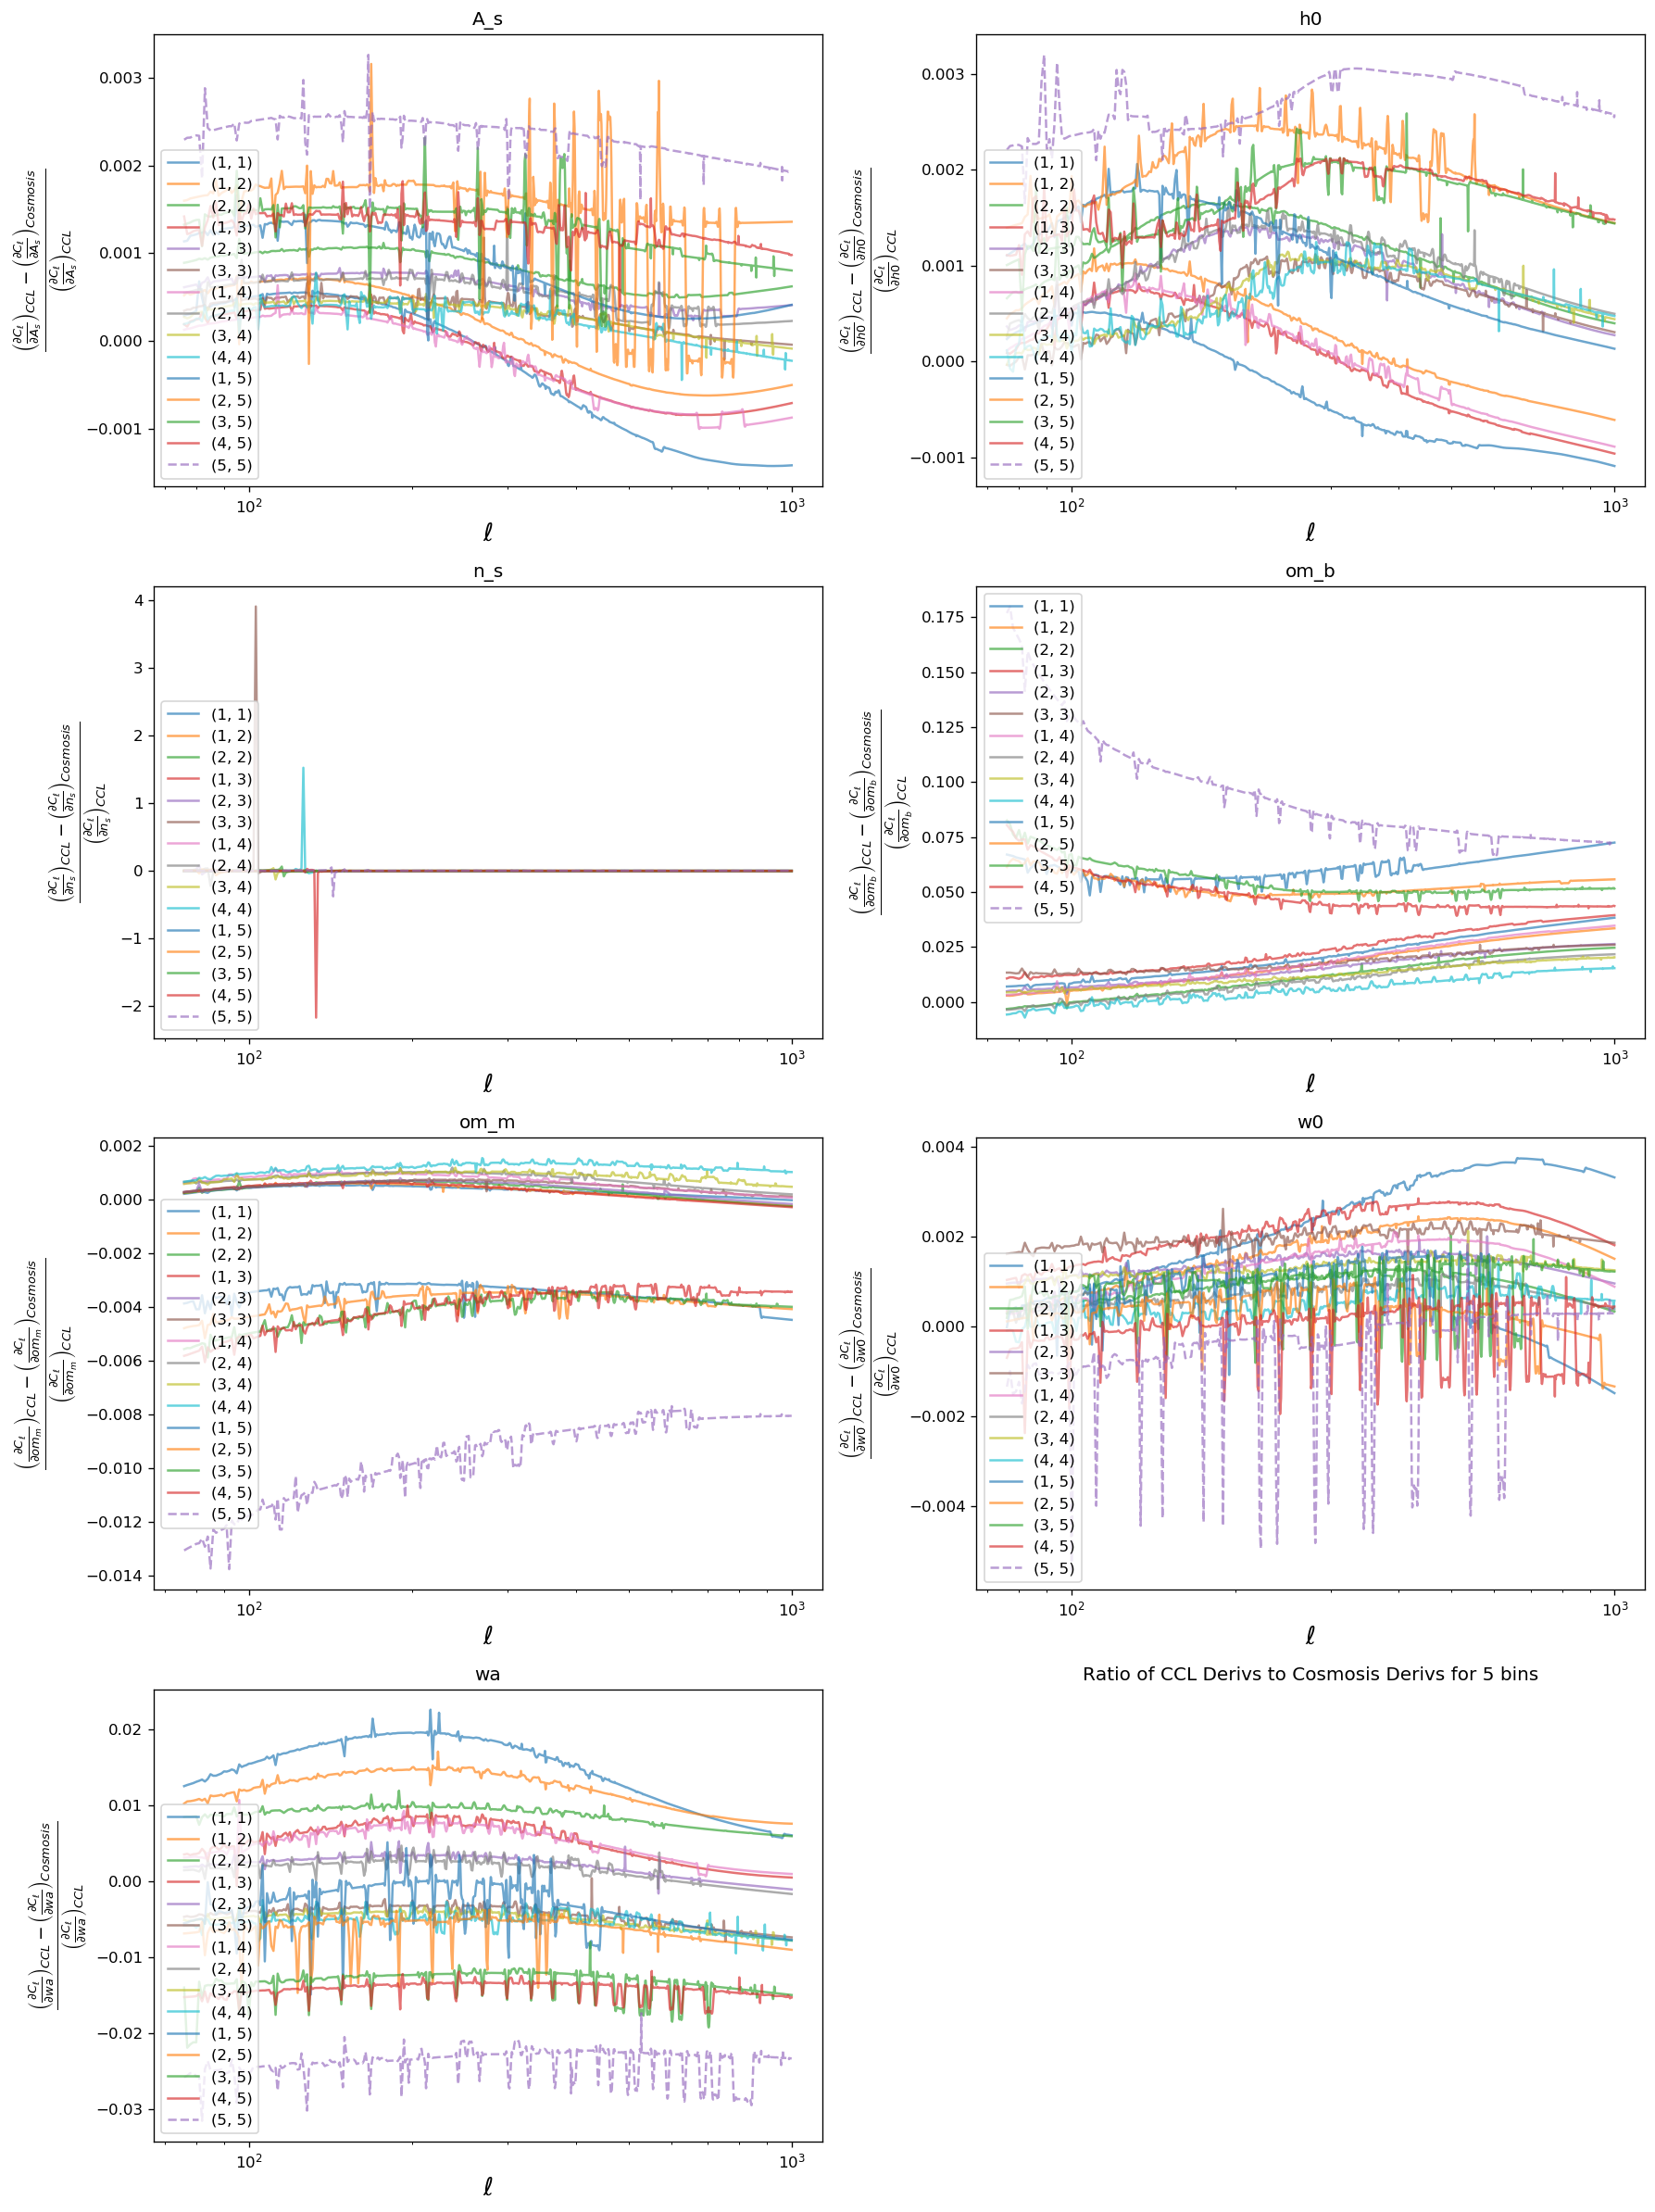

In [240]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20), dpi=120)
axes = axes.flatten()
plt.title("Ratio of CCL Derivs to Cosmosis Derivs for 5 bins")
for i in range(len(ccl_derivs)):
    for j in range(len(ccl_derivs[i][0])-1):
        linestyle = "--" if j == 14 else "-"
        axes[i].set_title("%s"%cosmosis_derivs_order[i][6:-13])
        axes[i].semilogx(ccl_derivs[i][:, 0], \
                          (ccl_derivs[i][:, j+1]-cosmosis_derivs[i][:, j+1])/ccl_derivs[i][:, j+1], \
                          alpha=0.65, \
                          label=orderings[j],
                          linestyle=linestyle)
    axes[i].legend()
    axes[i].set_xlabel(r'$\ell$', fontsize=16)
    axes[i].set_ylabel(r'$\frac{\left(\frac{\partial C_\ell}{\partial %s}\right)_{CCL} - \left(\frac{\partial C_\ell}{\partial %s}\right)_{Cosmosis}}{\left(\frac{\partial C_\ell}{\partial %s}\right)_{CCL}}$'%(cosmosis_derivs_order[i][6:-13], cosmosis_derivs_order[i][6:-13],cosmosis_derivs_order[i][6:-13]),
                       fontsize=16)

axes[-1].axis("off")    
plt.tight_layout()
plt.show()

### Focus on what is happening with n_s

In [53]:
import pandas as pd

In [88]:
ccl_ns_deriv = pd.DataFrame(ccl_derivs[2][:, 1:], index=ccl_derivs[2][:, 0], columns=["ccl %d,%d"%(i[0], i[1]) for i in orderings])
cosmosis_ns_deriv = pd.DataFrame(cosmosis_derivs[2][:, 1:], index=cosmosis_derivs[2][:, 0], columns=["cosmosis %d,%d"%(i[0], i[1]) for i in orderings])

/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/numpy/ma/core.py:6717: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/nbhandar/usr/anaconda3/envs/ccl_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:195: UserWarning: When passing multiple axes, layout keyword is ignored
  UserWarning,


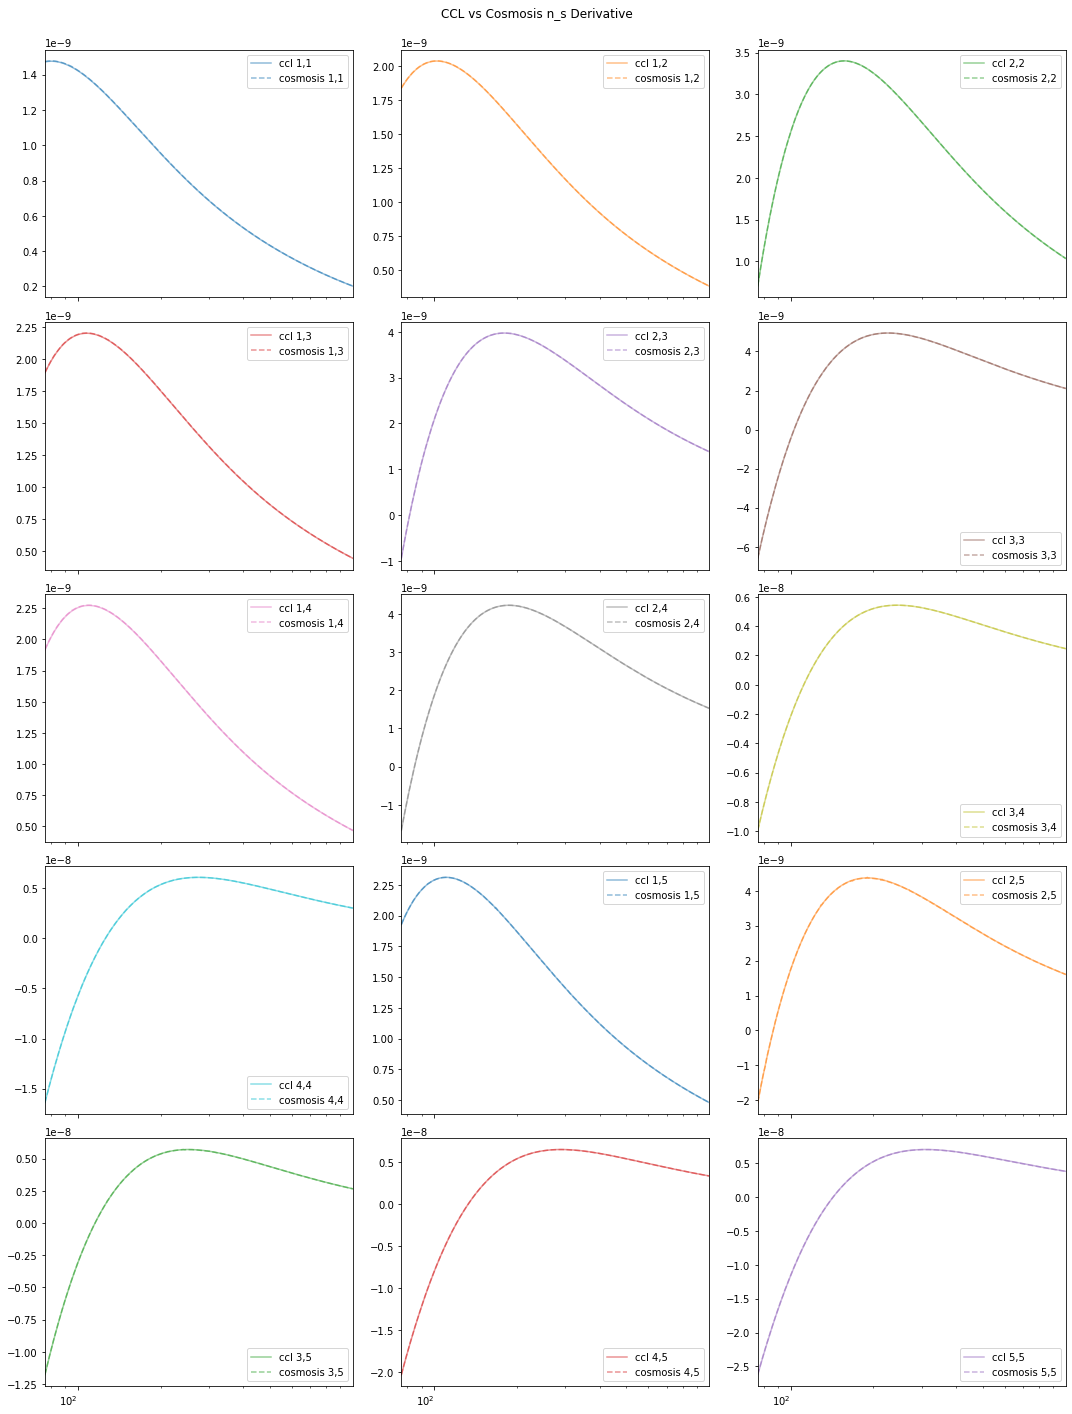

In [121]:
axes = (ccl_ns_deriv).plot(subplots=True, 
                           figsize=(15,20), 
                           alpha=0.5, 
                           logx=True, 
                           layout=(5,3), 
                           title="CCL vs Cosmosis n_s Derivative")
cosmosis_ns_deriv.plot(ax=axes, 
                       subplots=True, 
                       linestyle='--', 
                       alpha=0.5, 
                       logx=True, 
                       layout=(5,3))
fig = plt.gcf()
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

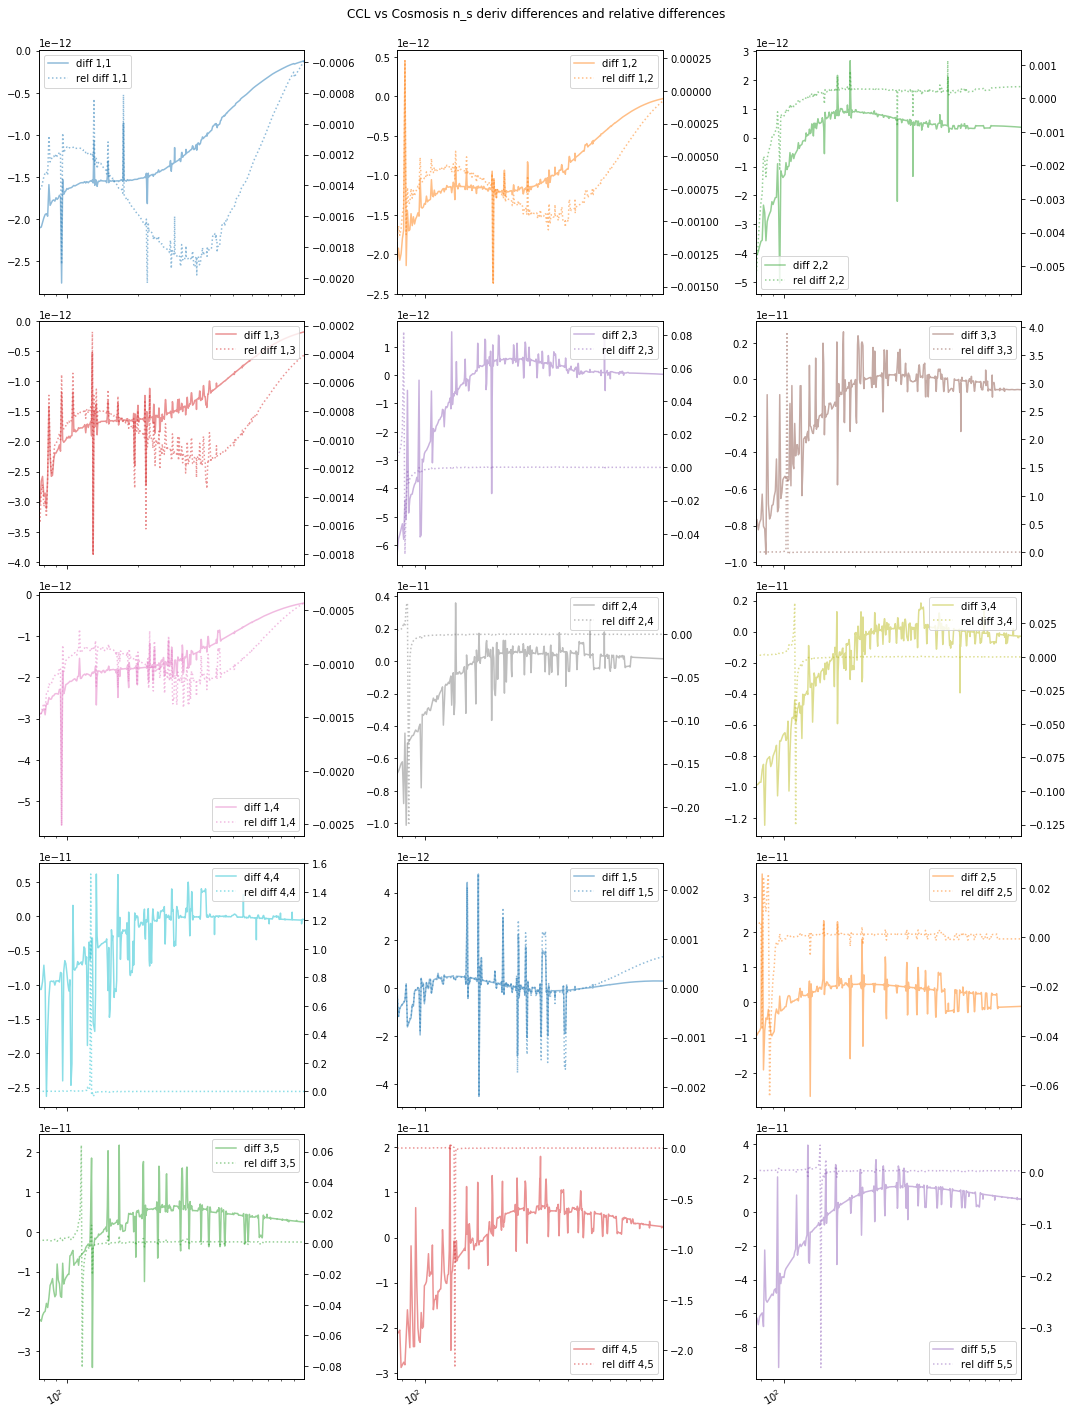

In [134]:
axes = (ccl_ns_deriv.rename(columns={"ccl %d,%d"%(i[0], i[1]): i for i in orderings}) - 
        cosmosis_ns_deriv.rename(columns={"cosmosis %d,%d"%(i[0], i[1]): i for i in orderings}))\
        .rename(columns={i: "diff %d,%d"%(i[0], i[1]) for i in orderings})\
        .plot(subplots=True,
              figsize=(15,20),
              linestyle='-', 
              alpha=0.5, 
              logx=True, 
              layout=(5,3),
              title="CCL vs Cosmosis n_s deriv differences and relative differences",
              label="diff",
              legend=False
            )
h1_l1_s = [ax.get_legend_handles_labels() for ax in axes.flatten()]
axes2 = ((ccl_ns_deriv.rename(columns={"ccl %d,%d"%(i[0], i[1]): i for i in orderings}) - 
 cosmosis_ns_deriv.rename(columns={"cosmosis %d,%d"%(i[0], i[1]): i for i in orderings}))/ccl_ns_deriv.values)\
        .rename(columns={i: "rel diff %d,%d"%(i[0], i[1]) for i in orderings})\
        .plot(ax=axes,
              subplots=True, 
              linestyle=':',
#               color='k',
              alpha=0.5, 
              logx=True, 
              layout=(5,3),
              secondary_y=True,
              label="rel diff")
for i, ax in enumerate(axes.flatten()):
    h1, l1 = h1_l1_s[i]
    h2, l2 = axes2.flatten()[i].get_legend_handles_labels()
    axes2.flatten()[i].legend(h1+h2, l1+l2,)
fig = plt.gcf()
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Comparison of Fisher Matrices

In [33]:
import seaborn as sns

In [179]:
f_ccl = np.loadtxt("fisher_out.dat")
f_cosmosis = np.loadtxt("fisher_out_cosmosis.dat")

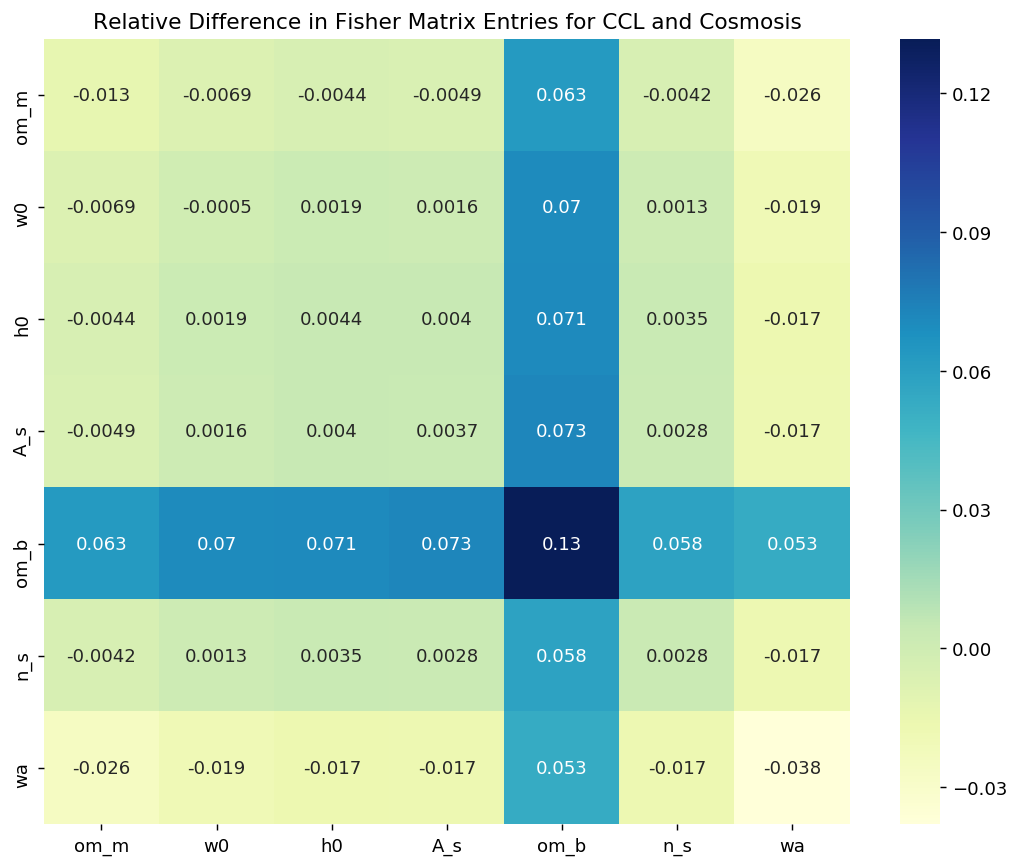

In [235]:
fig, ax = plt.subplots(figsize=(10,8), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((f_ccl - f_cosmosis)/f_ccl, 
            annot=True, 
            cmap="YlGnBu",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Relative Difference in Fisher Matrix Entries for CCL and Cosmosis")
plt.show()

## Comparison of Fisher Matrices With Priors

In [31]:
f_ccl = np.loadtxt("fisher_with_priors_out.dat")
f_cosmosis = np.loadtxt("ccl_cosmosis_deriv_comparison/fisher_out_with_priors_cosmosis.dat")

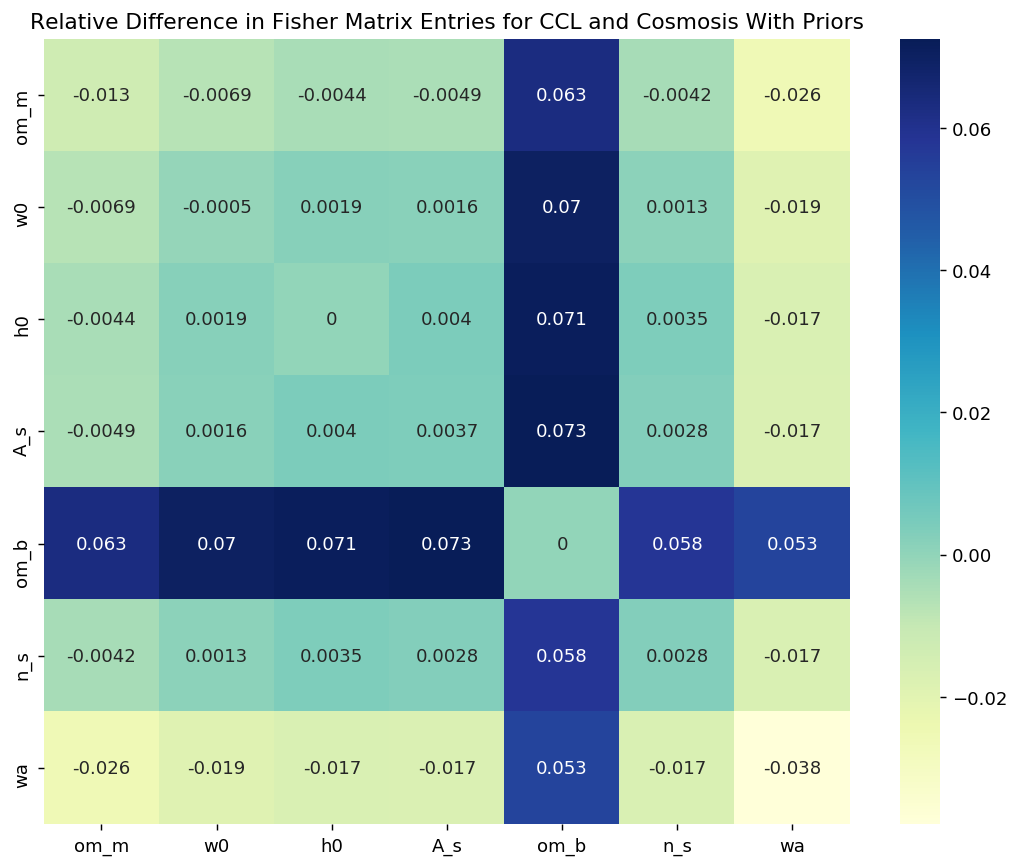

In [36]:
fig, ax = plt.subplots(figsize=(10,8), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap((f_ccl - f_cosmosis)/f_ccl, 
            annot=True, 
            cmap="YlGnBu",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Relative Difference in Fisher Matrix Entries for CCL and Cosmosis With Priors")
plt.show()

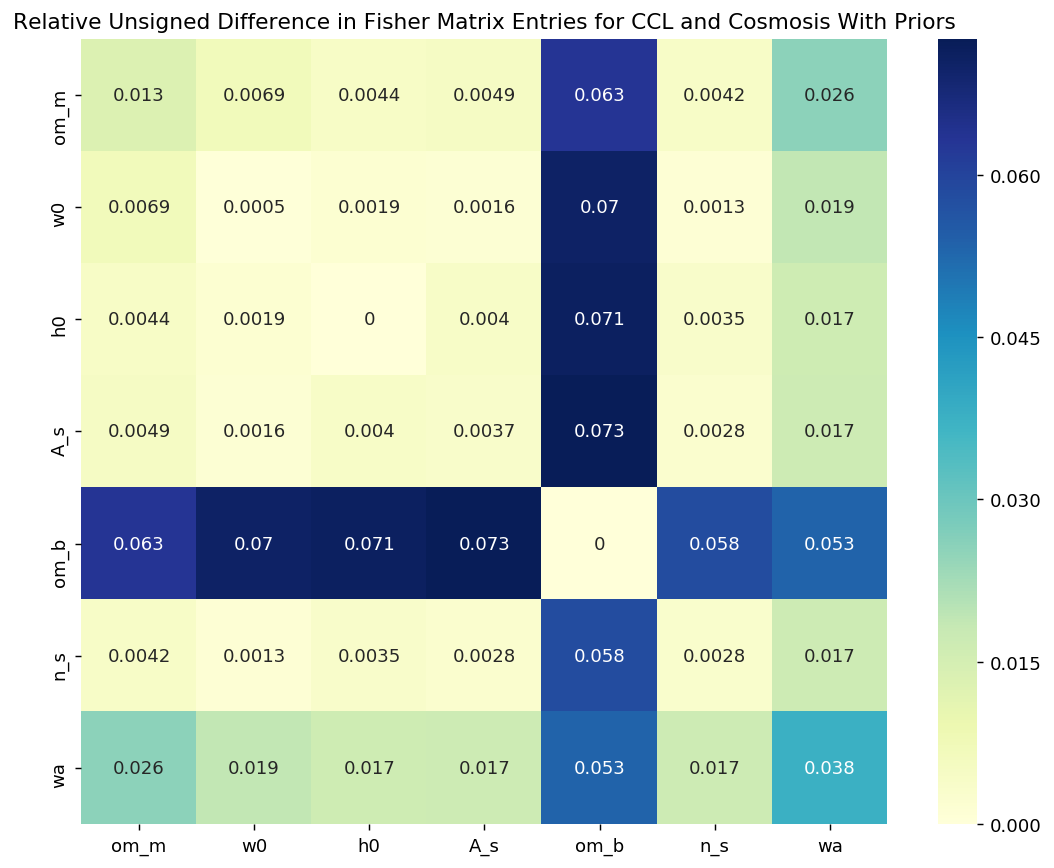

In [44]:
fig, ax = plt.subplots(figsize=(10,8), dpi=130) 
paras = ["om_m", "w0", "h0", "A_s", "om_b", "n_s", "wa"]
sns.heatmap(abs(f_ccl - f_cosmosis)/abs(f_ccl), 
            annot=True, 
            cmap="YlGnBu",
            xticklabels=paras, yticklabels=paras,
            ax=ax, )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Relative Unsigned Difference in Fisher Matrix Entries for CCL and Cosmosis With Priors")
plt.show()

# Checking if binning before or after calculating derivative matters

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
nbins = 5
orderings = [(i, j) for j in range(1, nbins+1) for i in range(1, j+1)]

In [12]:
binned_before = sorted([i for i in os.listdir(".") if i.find("deriv_")== 0 and i.find("binned") < 0])
binned_after  = sorted([i for i in os.listdir(".") if i.find("deriv_")== 0 and i.find("binned") >= 0])

In [27]:
paras = [i[6:-16] for i in binned_before]

In [15]:
binned_deriv_before = [np.loadtxt(i) for i in binned_before]
binned_deriv_after = [np.loadtxt(i) for i in binned_after]

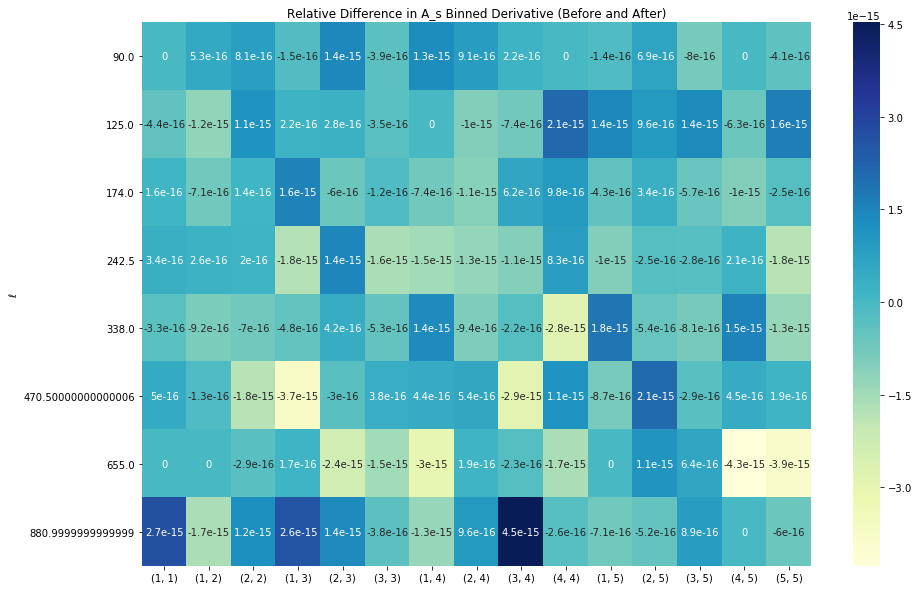

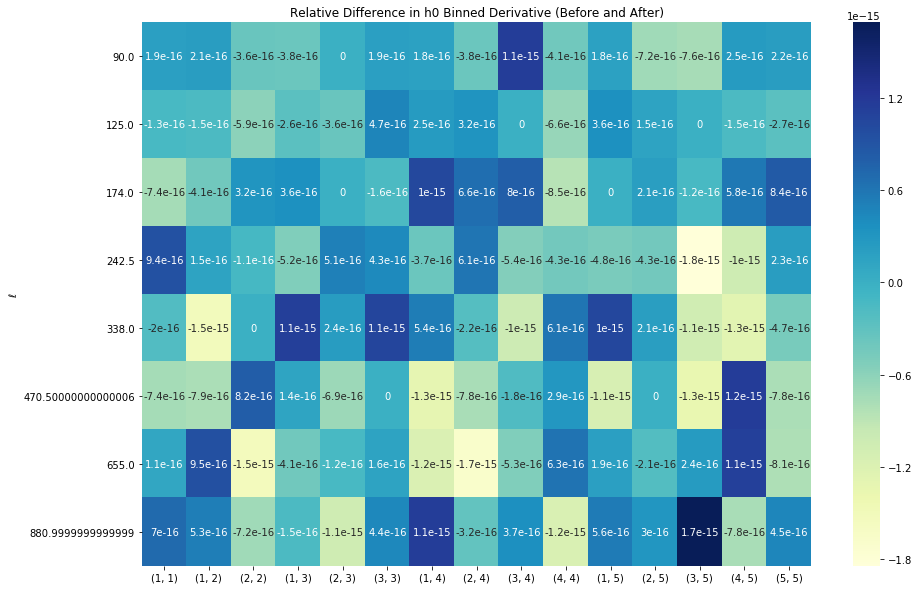

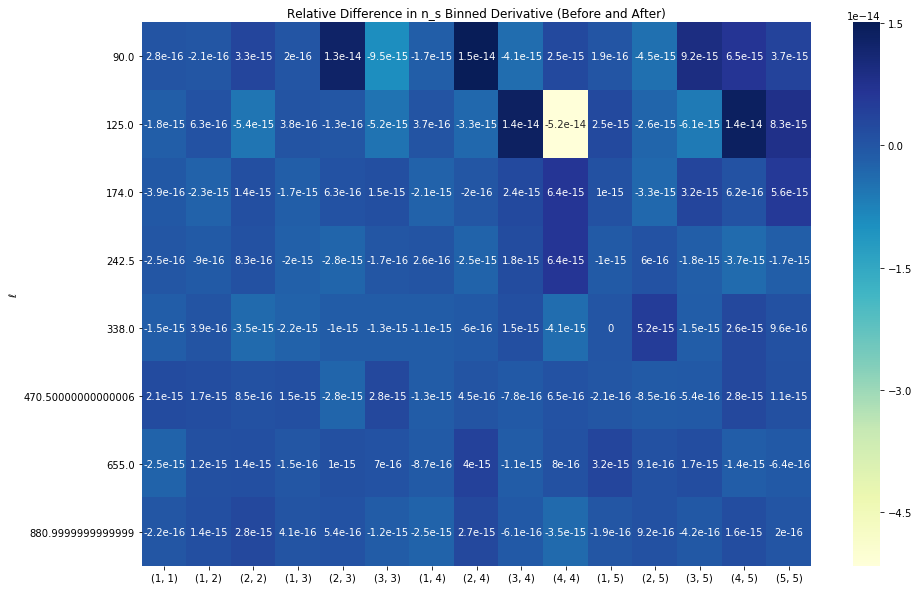

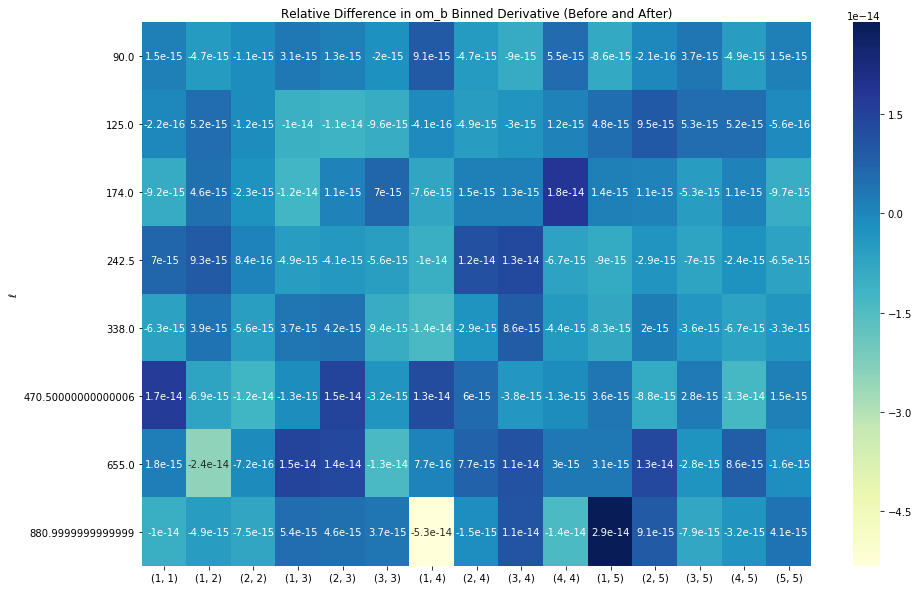

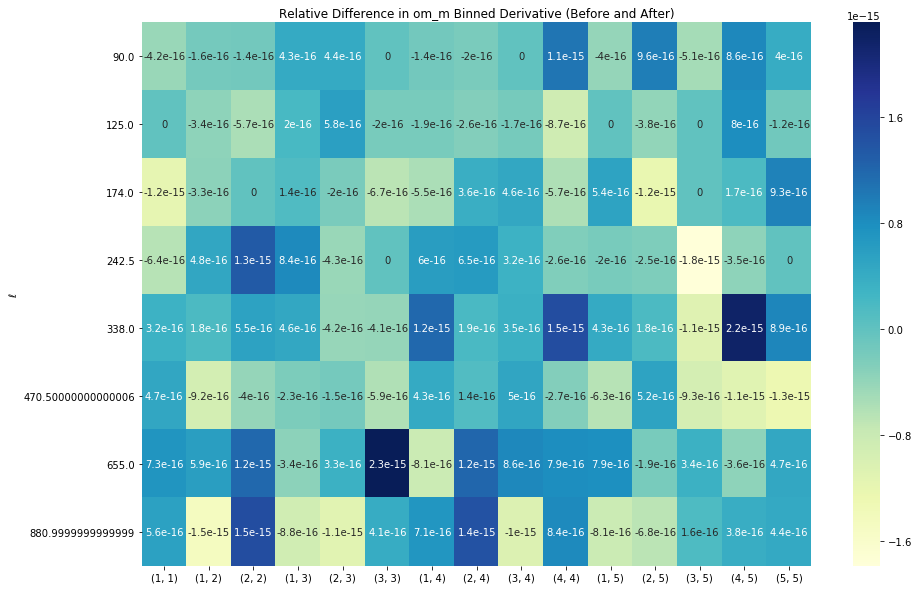

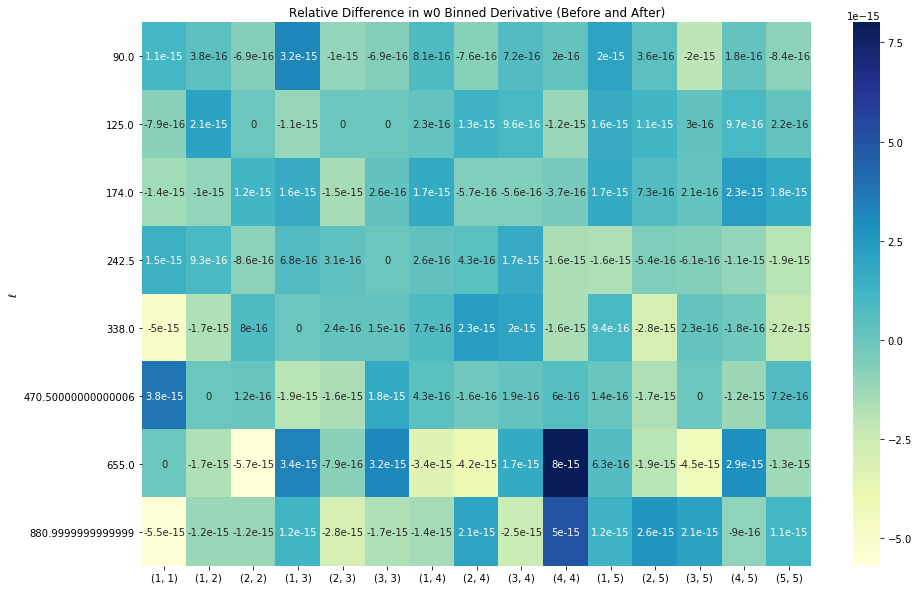

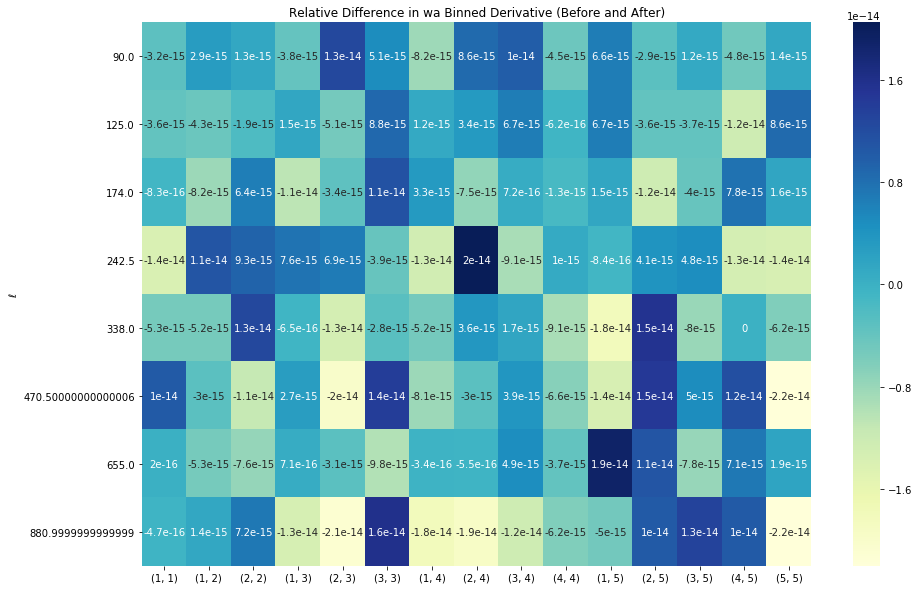

In [58]:
for i, para in enumerate(paras):
    df_before = pd.DataFrame(binned_deriv_before[i][:, 1:], index=binned_deriv_before[i][:, 0], columns=orderings)
    df_after = pd.DataFrame(binned_deriv_after[i][:, 1:], index=binned_deriv_before[i][:, 0], columns=orderings)
    diff = (df_after-df_before)/abs(df_before)
    plt.figure(figsize = (15,10))
    sns.heatmap(diff, annot=True, cmap="YlGnBu",)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("Relative Difference in %s Binned Derivative (Before and After)"%para)
    plt.ylabel(r'$\ell$')
    plt.show()

According to these plots, it doesn't make a difference whether we bin first and then calculate derivatives or calculate derivatives and then bin them, the relative differences are very tiny: $\sim  10^{-16} - 10^{-14}$

# Check C_ells vs binned C_ells

In [59]:
c_ells = np.loadtxt("Cl_fid.dat")
binned_c_ells = np.loadtxt("Cl_fid_binned.dat")

In [60]:
c_ells = pd.DataFrame(c_ells[:, 1:], index=c_ells[:, 0], columns=orderings)
binned_c_ells = pd.DataFrame(binned_c_ells[:, 1:], index=binned_c_ells[:, 0], columns=orderings)

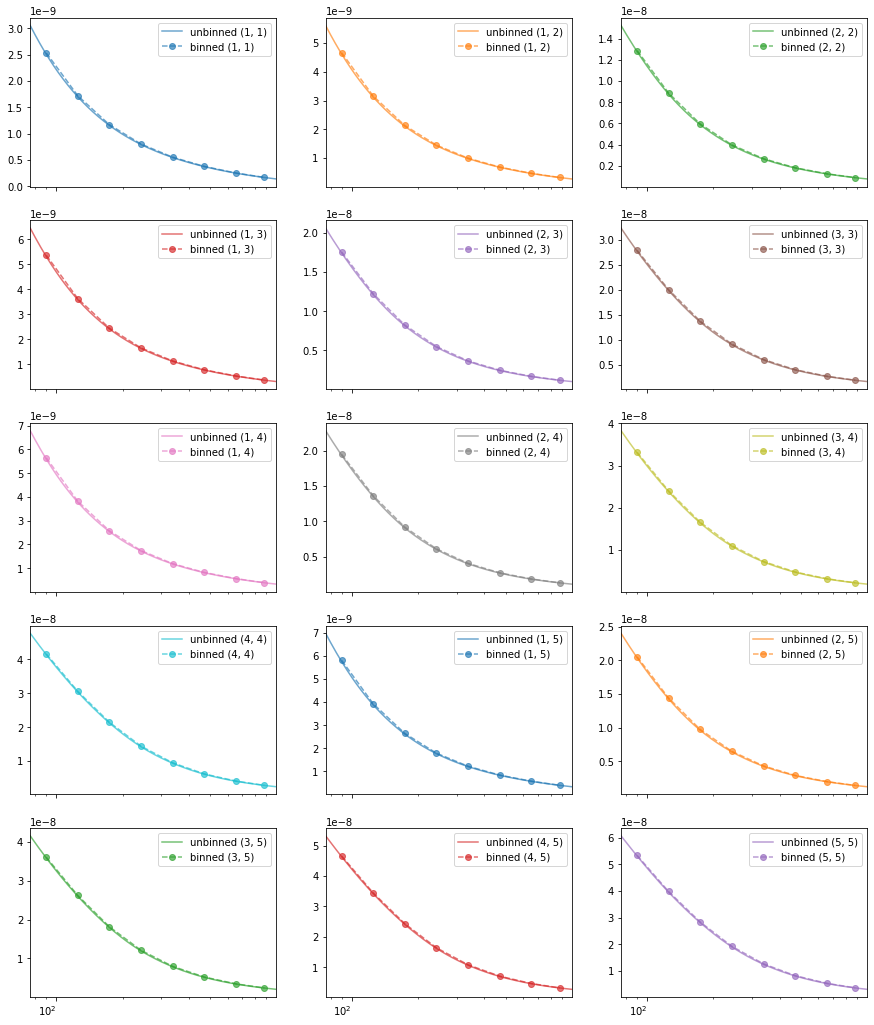

In [79]:
axes = c_ells.plot(subplots=True, layout=(5,3), figsize=(15,20), label="unbinned" , alpha=0.65, logx=True)
axes2 = binned_c_ells.plot(ax=axes, subplots=True, linestyle='--', marker='o', alpha=0.65, logx=True, label="binned")
for i, ax in enumerate(axes.flatten()):
    ax.legend(["unbinned (%d, %d)"%orderings[i], "binned (%d, %d)"%orderings[i]])